In [388]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
#print(data_breast_cancer['DESCR'])

In [389]:
X_train, X_test, y_train, y_test = train_test_split(
    data_breast_cancer['data'], data_breast_cancer['target'], test_size=0.2)

In [390]:
from sklearn.tree import DecisionTreeClassifier

In [391]:
res = []
for i in range(1, 11):
    tree_clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree_clf.fit(X_train, y_train)
    f1_train = f1_score(y_train, tree_clf.predict(X_train))
    f1_test = f1_score(y_test, tree_clf.predict(X_test))
    res.append((i, f1_train, f1_test))
res

[(1, 0.9449378330373002, 0.8920863309352518),
 (2, 0.9666080843585237, 0.9054054054054054),
 (3, 0.9805309734513273, 0.9230769230769231),
 (4, 0.9894736842105264, 0.9594594594594594),
 (5, 0.9947275922671353, 0.9594594594594594),
 (6, 0.998236331569665, 0.9517241379310345),
 (7, 1.0, 0.9517241379310345),
 (8, 1.0, 0.9517241379310345),
 (9, 1.0, 0.9517241379310345),
 (10, 1.0, 0.9517241379310345)]

In [392]:
depth = 5
tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

In [393]:
tree_clf.fit(X_train, y_train)
#tree_clf.predict(X_train) 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [394]:
from sklearn.tree import export_graphviz
f = "bc"
export_graphviz(tree_clf, out_file=f, feature_names=data_breast_cancer.feature_names,
                class_names=[str(num)+", "+name
                for num,name in
                zip(set(data_breast_cancer.target), data_breast_cancer.target_names)],
                rounded=True,
                filled=True )
print(graphviz.render("dot", "png", f))

bc.png


In [395]:
import graphviz
graph = graphviz.Source.from_file(f)
graph
str_dot = export_graphviz(tree_clf, out_file=None, feature_names=data_breast_cancer.feature_names,
                          class_names=[str(num)+", "+name
                        for num,name in zip(set(data_breast_cancer.target), data_breast_cancer.target_names)],
                          rounded=True, filled=True)
graph = graphviz.Source(str_dot)

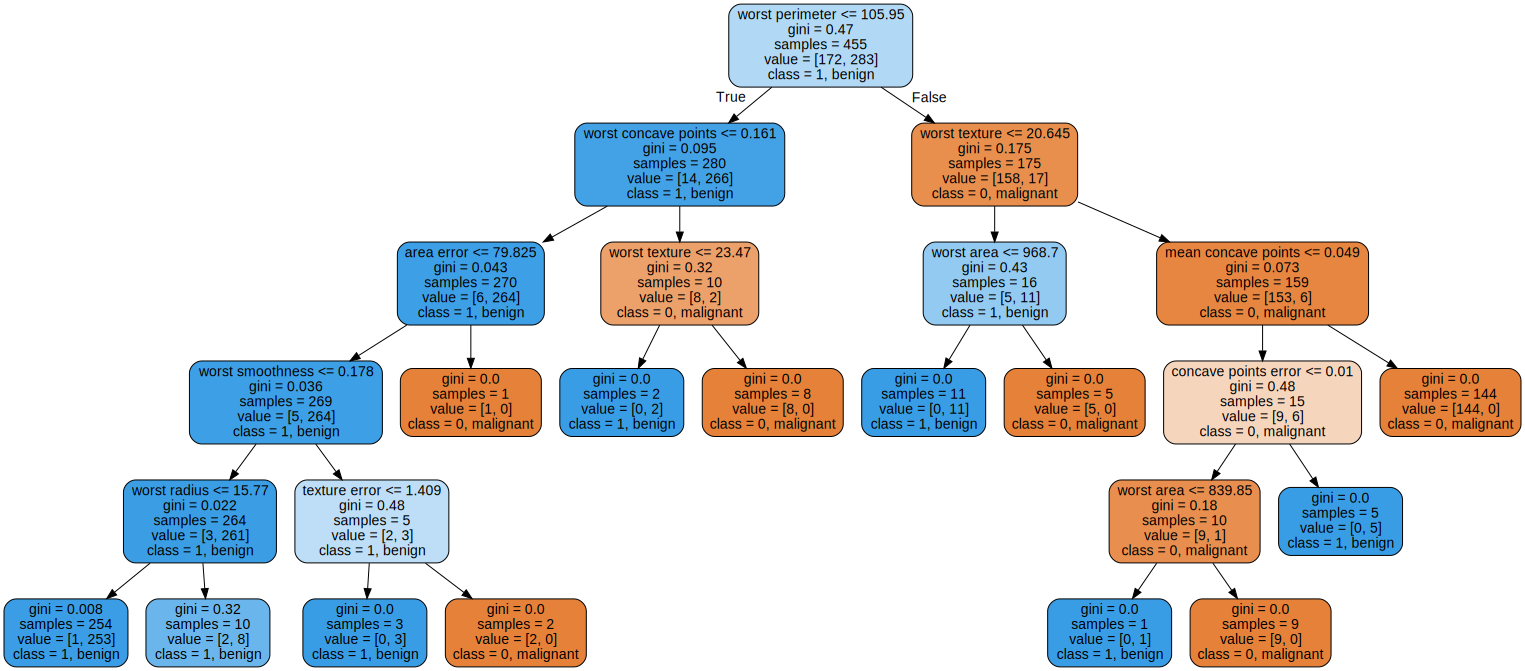

In [396]:
graph

In [397]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

y_pred_test = tree_clf.predict(X_test)
score_test = f1_score(y_test, y_pred_test)
acc_test = accuracy_score(y_test, y_pred_test)

y_pred_train = tree_clf.predict(X_train)
score_train = f1_score(y_train, y_pred_train)
acc_train = accuracy_score(y_train, y_pred_train)

In [398]:
import pickle
lista = [depth,score_train, score_test, acc_train , acc_test]
print(lista)
file = open('f1acc_tree.pkl','wb')
pickle.dump(lista,file)

[5, 0.9947275922671353, 0.9594594594594594, 0.9934065934065934, 0.9473684210526315]


In [399]:
file = open('f1acc_tree.pkl','rb')
a = pickle.load(file)
print(a)

[5, 0.9947275922671353, 0.9594594594594594, 0.9934065934065934, 0.9473684210526315]


In [400]:
#REGRESJA

<AxesSubplot:xlabel='x', ylabel='y'>

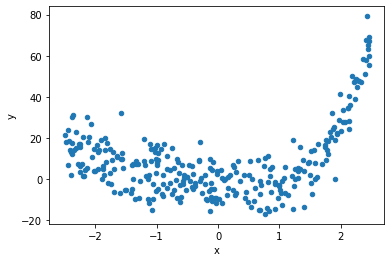

In [401]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [402]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(df[['x']], df[['y']], test_size= 0.2, random_state=42)

In [403]:
res = []
for i in range(1, 11):
    tree_reg = DecisionTreeRegressor(max_depth = i, random_state=42)
    tree_reg.fit(X_train, y_train)
    mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
    mse_test = mean_squared_error(y_test, tree_reg.predict(X_test))
    res.append((i, mse_train, mse_test))
res

[(1, 122.89862707602354, 100.44891907515743),
 (2, 88.18698016501499, 84.87477083538339),
 (3, 64.2383022717663, 80.52412192536084),
 (4, 57.80627472526161, 68.96426329218937),
 (5, 47.69825168880079, 78.35380891087185),
 (6, 41.97427569814467, 80.07392385092771),
 (7, 35.30618078679287, 93.5702749748633),
 (8, 27.769548346588163, 127.4031010858861),
 (9, 24.761045558016317, 123.55861605099153),
 (10, 18.497656390549686, 135.64881379916363)]

In [404]:
from sklearn.metrics import mean_squared_error
depth = 4
tree_reg = DecisionTreeRegressor(max_depth = depth, random_state=42)
tree_reg.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
mse_test = mean_squared_error(y_test, tree_reg.predict(X_test))

In [405]:
lista2 = [depth, mse_train, mse_test]

In [406]:
print(lista2)
file = open('mse_tree.pkl','wb')
pickle.dump(lista2,file)

[4, 57.80627472526161, 68.96426329218937]


In [407]:
file = open('mse_tree.pkl','rb')
a = pickle.load(file)
print(a)

[4, 57.80627472526161, 68.96426329218937]


In [408]:
print(mse_train, mse_test)

57.80627472526161 68.96426329218937


In [409]:
file_name_reg = "reg"

export_graphviz(
    tree_reg,
    out_file=file_name_reg,
    feature_names=["x"],
    class_names=["x"],
    rounded=True,
    filled=True,
)
print(graphviz.render("dot", "png", file_name_reg))

reg.png


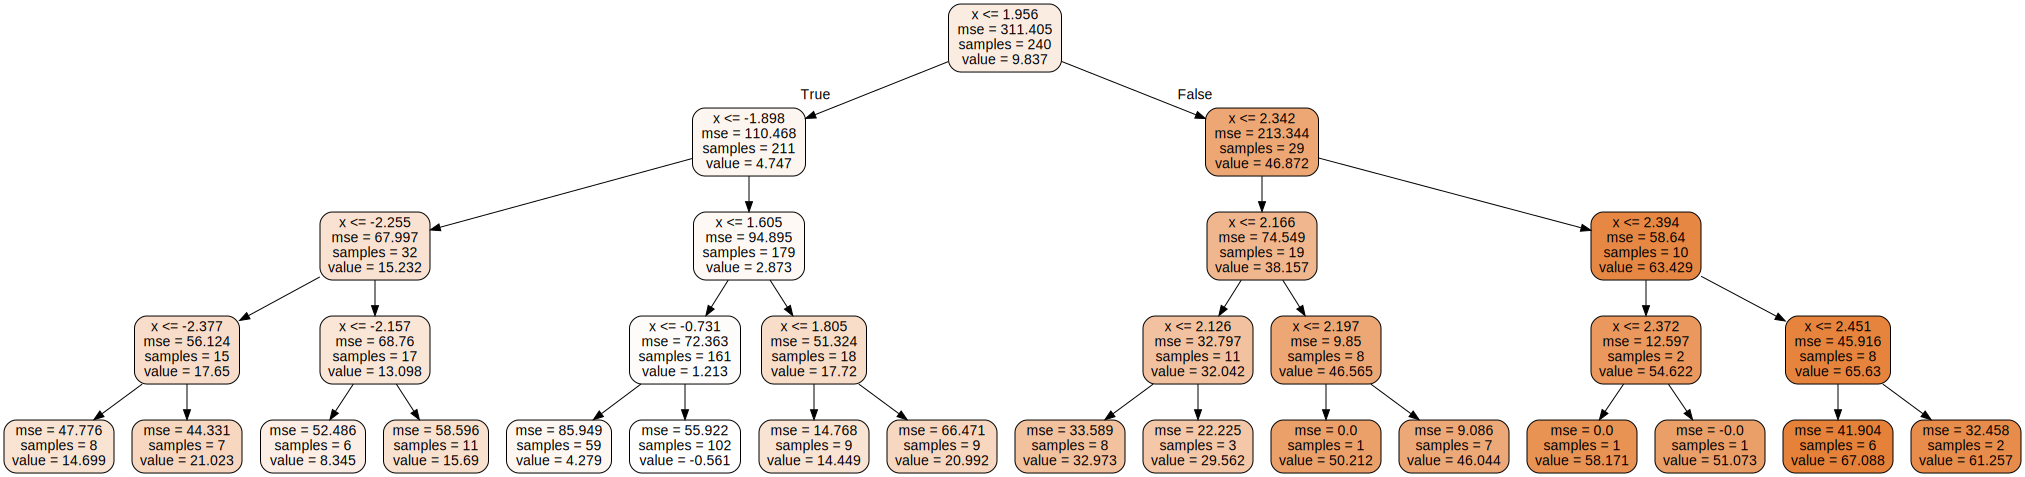

In [410]:
graph = graphviz.Source.from_file(file_name_reg)
graph
str_dot_reg = export_graphviz(
    tree_reg,
    out_file=None,
    feature_names=["x"],
    class_names=["x"],
    rounded=True,
    filled=True,
)
graph = graphviz.Source(str_dot_reg)
graph